# 02_a. Machine Learnig & Deep Learning Basic

* 파이썬을 이용한 딥러닝 기반 자연어처리 
* 김무성

--------------------------

# 차례
* Tensorflow 간단 소개
* Machine Learning & DeepLearng 기초
    - Classify image - 첫 번째 신경망 훈련하기: 기초적인 분류 문제
    - Classify text - 영화 리뷰를 사용한 텍스트 분류
    - Overfittig and underfitting

--------------------------------

# Tensorflow 간단 소개
* 설치
* Eager Execution

<img src="https://cdn-images-1.medium.com/max/1600/0*fJ5u2WE51Oz44dr_" width=600 />

* 출처 - https://medium.com/tensorflow/whats-coming-in-tensorflow-2-0-d3663832e9b8

<img src="https://qph.fs.quoracdn.net/main-qimg-27cbf5c6c55a90a6a1b886ab2591181d" width=600 />

* 출처 - https://www.quora.com/Are-the-new-changes-in-TensorFlow-2-0-going-to-shift-PyTorch-users-to-TF

<img src="https://cdn-images-1.medium.com/max/1600/1*2mI_CfSOhyl0if-o-d7O4A.png" width=600 />

* 출처 - https://hackernoon.com/machine-learning-with-tensorflow-8873fdee2b68

<img src="http://www.programmersought.com/images/167/2cd5104b17840ea66da114eb3abcb147.png" width=600 />

<img src="http://www.programmersought.com/images/297/4f09fc42fee15c482c1e7e166c7a0e39.png" width=600 />

<img src="http://www.programmersought.com/images/894/38fdf5666bb96ce632a556f4534fb97e.png" width=600 />

2.0에서는 eager_execution이 기본 모드가 됨.

<img src="http://www.programmersought.com/images/710/f7e4ace6dffee68ddc0b948bbdc5bece.png" width=600 />

* 출처 - http://www.programmersought.com/article/8939513649/

## 설치
* 현재 실습 환경에서는 이미 설치되어 있다.
* 하지만 만약 새로 환경을 구성한다면 보통 아래와 같이 pip를 통해 쉽게 설치할 수 있다. 

```shell
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tensorflow-gpu==2.0.0-alpha0 # colab을 쓴다면 구글 tpu의 지원을 받기 때문에 가능하다. 
                                          # 개인 컴퓨터나 서버라면 gpu가 셋팅되어 있을 때만 가능

!pip install tensorflow==2.0.0-alpha0 # gpu가 셋팅되어 있지 않다면 이걸로 설치    
```

---------------------------

In [1]:
import tensorflow as tf

print(tf.__version__)

2.0.0-alpha0


## Eager Execution
* Setup and basic usage
* Dynamic control flow
* Build a model
* Eager training

## Setup and basic usage

In [2]:
# In Tensorflow 2.0, eager execution is enabled by default.
tf.executing_eagerly()

True

In [3]:
x = [[2.]]
m = tf.matmul(x, x)
print("hello, {}".format(m))

hello, [[4.]]


In [4]:
a = tf.constant([[1, 2],
                 [3, 4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


In [5]:
# Broadcasting support
b = tf.add(a, 1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


In [6]:
# Operator overloading is supported
print(a * b)

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


In [7]:
# Use NumPy values
import numpy as np

c = np.multiply(a, b)
print(c)

[[ 2  6]
 [12 20]]


In [8]:
# Obtain numpy value from a tensor:
print(a.numpy())
# => [[1 2]
#     [3 4]]

[[1 2]
 [3 4]]


### Dynamic control flow

A major benefit of eager execution is that all the functionality of the host language is available while your model is executing. So, for example, it is easy to write fizzbuzz

In [9]:
def fizzbuzz(max_num):
  counter = tf.constant(0)
  max_num = tf.convert_to_tensor(max_num)
  for num in range(1, max_num.numpy()+1):
    num = tf.constant(num)
    if int(num % 3) == 0 and int(num % 5) == 0:
      print('FizzBuzz')
    elif int(num % 3) == 0:
      print('Fizz')
    elif int(num % 5) == 0:
      print('Buzz')
    else:
      print(num.numpy())
    counter += 1

In [10]:
fizzbuzz(15)

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz


This has conditionals that depend on tensor values and it prints these values at runtime.

### Build a model

Many machine learning models are represented by composing layers. When using TensorFlow with eager execution you can either write your own layers or use a layer provided in the tf.keras.layers package.

While you can use any Python object to represent a layer, TensorFlow has tf.keras.layers.Layer as a convenient base class. Inherit from it to implement your own layer, and set self.dynamic=True in the constructor if the layer must be executed imperatively:

In [11]:
class MySimpleLayer(tf.keras.layers.Layer):
  def __init__(self, output_units):
    super(MySimpleLayer, self).__init__()
    self.output_units = output_units
    self.dynamic = True

  def build(self, input_shape):
    # The build method gets called the first time your layer is used.
    # Creating variables on build() allows you to make their shape depend
    # on the input shape and hence removes the need for the user to specify
    # full shapes. It is possible to create variables during __init__() if
    # you already know their full shapes.
    self.kernel = self.add_variable(
      "kernel", [input_shape[-1], self.output_units])

  def call(self, input):
    # Override call() instead of __call__ so we can perform some bookkeeping.
    return tf.matmul(input, self.kernel)

Use tf.keras.layers.Dense layer instead of MySimpleLayer above as it has a superset of its functionality (it can also add a bias).

When composing layers into models you can use tf.keras.Sequential to represent models which are a linear stack of layers. It is easy to use for basic models:

In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=(784,)),  # must declare input shape
  tf.keras.layers.Dense(10)
])

Alternatively, organize models in classes by inheriting from tf.keras.Model. This is a container for layers that is a layer itself, allowing tf.keras.Model objects to contain other tf.keras.Model objects.

In [13]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(units=10)
    self.dense2 = tf.keras.layers.Dense(units=10)

  def call(self, input):
    """Run the model."""
    result = self.dense1(input)
    result = self.dense2(result)
    result = self.dense2(result)  # reuse variables from dense2 layer
    return result

model = MNISTModel()

### Eager training
* Computing gradients
* Train a model
* Variables and optimizers

#### Computing gradients

Automatic differentiation is useful for implementing machine learning algorithms such as backpropagation for training neural networks. During eager execution, use tf.GradientTape to trace operations for computing gradients later.

tf.GradientTape is an opt-in feature to provide maximal performance when not tracing. Since different operations can occur during each call, all forward-pass operations get recorded to a "tape". To compute the gradient, play the tape backwards and then discard. A particular tf.GradientTape can only compute one gradient; subsequent calls throw a runtime error.

In [14]:
w = tf.Variable([[1.0]])
with tf.GradientTape() as tape:
  loss = w * w

In [15]:
grad = tape.gradient(loss, w)
print(grad)  # => tf.Tensor([[ 2.]], shape=(1, 1), dtype=float32)

tf.Tensor([[2.]], shape=(1, 1), dtype=float32)


#### Train a model

The following example creates a multi-layer model that classifies the standard MNIST handwritten digits. It demonstrates the optimizer and layer APIs to build trainable graphs in an eager execution environment.

In [16]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

In [17]:
dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))

dataset = dataset.shuffle(1000).batch(32)

In [18]:
# Build the model
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,[3,3], activation='relu',
                         input_shape=(None, None, 1)),
  tf.keras.layers.Conv2D(16,[3,3], activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(10)
])

Even without training, call the model and inspect the output in eager execution:

In [19]:
for images,labels in dataset.take(1):
  print("Logits: ", mnist_model(images[0:1]).numpy())

Logits:  [[ 0.05437699  0.00627477 -0.03606186 -0.0262526   0.02678446 -0.02620657
  -0.06071255 -0.02267479 -0.05375344 -0.05881488]]


While keras models have a builtin training loop (using the fit method), sometimes you need more customization. Here's an example, of a training loop implemented with eager:

In [20]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_history = []

In [21]:
for (batch, (images, labels)) in enumerate(dataset.take(400)):
  if batch % 10 == 0:
    print('.', end='')
  with tf.GradientTape() as tape:
    logits = mnist_model(images, training=True)
    loss_value = loss_object(labels, logits)

  loss_history.append(loss_value.numpy().mean())
  grads = tape.gradient(loss_value, mnist_model.trainable_variables)
  optimizer.apply_gradients(zip(grads, mnist_model.trainable_variables))

........................................

Text(0,0.5,'Loss [entropy]')

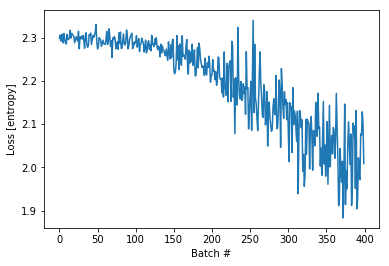

In [22]:
%matplotlib inline 
# 그래프 결과가 컴퓨터에 별도 창이 아닌 jupyter notebook 안에서 그려지도록 
# 한 jupyter notebook에서는 딱 한번만 이 매직키워드를 사용하면 됨  

import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

#### Variables and optimizers

tf.Variable objects store mutable tf.Tensor values accessed during training to make automatic differentiation easier. The parameters of a model can be encapsulated in classes as variables.

Better encapsulate model parameters by using tf.Variable with tf.GradientTape. For example, the automatic differentiation example above can be rewritten:

In [23]:
class Model(tf.keras.Model):
  def __init__(self):
    super(Model, self).__init__()
    self.W = tf.Variable(5., name='weight')
    self.B = tf.Variable(10., name='bias')
  def call(self, inputs):
    return inputs * self.W + self.B

# A toy dataset of points around 3 * x + 2
NUM_EXAMPLES = 2000
training_inputs = tf.random.normal([NUM_EXAMPLES])
noise = tf.random.normal([NUM_EXAMPLES])
training_outputs = training_inputs * 3 + 2 + noise

# The loss function to be optimized
def loss(model, inputs, targets):
  error = model(inputs) - targets
  return tf.reduce_mean(tf.square(error))

def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return tape.gradient(loss_value, [model.W, model.B])

# Define:
# 1. A model.
# 2. Derivatives of a loss function with respect to model parameters.
# 3. A strategy for updating the variables based on the derivatives.
model = Model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

print("Initial loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))

# Training loop
for i in range(300):
  grads = grad(model, training_inputs, training_outputs)
  optimizer.apply_gradients(zip(grads, [model.W, model.B]))
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss(model, training_inputs, training_outputs)))

print("Final loss: {:.3f}".format(loss(model, training_inputs, training_outputs)))
print("W = {}, B = {}".format(model.W.numpy(), model.B.numpy()))


Initial loss: 68.279
Loss at step 000: 65.622
Loss at step 020: 29.862
Loss at step 040: 13.880
Loss at step 060: 6.737
Loss at step 080: 3.544
Loss at step 100: 2.117
Loss at step 120: 1.480
Loss at step 140: 1.195
Loss at step 160: 1.067
Loss at step 180: 1.010
Loss at step 200: 0.985
Loss at step 220: 0.974
Loss at step 240: 0.968
Loss at step 260: 0.966
Loss at step 280: 0.965
Final loss: 0.965
W = 3.011579990386963, B = 2.0459043979644775


-----------------------------------------------

# Machine Learning & DeepLearning 기초 
* Classify image - 첫 번째 신경망 훈련하기: 기초적인 분류 문제
* Classify text - 영화 리뷰를 사용한 텍스트 분류
* Overfittig and underfitting

<img src="https://raw.githubusercontent.com/psygrammer/about_python_dl/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap02.png" width=600 />

<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap03.png" width=300 />

<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap04.png" width=800 />

* 출처 - Deep Learning with Python - https://www.manning.com/books/deep-learning-with-python

<img src="https://developer.ibm.com/developer/articles/cc-models-machine-learning/images/figure01.png" width=600 />

* 출처 - https://developer.ibm.com/articles/cc-models-machine-learning/

<img src="https://vitalflux.com/wp-content/uploads/2018/02/Screen-Shot-2018-02-04-at-8.10.20-PM.png" width = 600 />

* 출처 - https://vitalflux.com/dummies-notes-supervised-vs-unsupervised-learning/

<img src="http://cs231n.github.io/assets/imagemap.jpg" width=600 />

<img src="http://cs231n.github.io/assets/pixelspace.jpeg" width=600 />

* 출처 - http://cs231n.github.io/linear-classify/

<img src="http://cs231n.github.io/assets/stepsize.jpg" width=400 />

<img src="http://cs231n.github.io/assets/dataflow.jpeg" width=600 />

* 출처 - http://cs231n.github.io/optimization-1/

* 출처 - http://cs231n.github.io/optimization-1/

<img src="http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width=600 />

* 출처 - http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/

<img src="https://msampler.files.wordpress.com/2009/07/cvx-fun.gif" width=600 />

<img src="https://camo.githubusercontent.com/30bf2d42d3a9b0e07dbc03a014f4e36dbc06904f/68747470733a2f2f7261772e6769746875622e636f6d2f7175696e6e6c69752f4d616368696e654c6561726e696e672f6d61737465722f696d61676573466f724578706c616e6174696f6e2f4772616469656e7444657363656e74576974684d75746c69706c654c6f63616c4d696e696d756d2e6a7067" width=600 />

* 출처 - Convex analysis - https://msampler.wordpress.com/2009/07/08/convex-analysis/


<img src="http://cs231n.github.io/assets/nn3/opt2.gif" width=600 />
<img src="http://cs231n.github.io/assets/nn3/opt1.gif" width=600 />

* 출처 - http://cs231n.github.io/neural-networks-3/

<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season01/ch01/figures/fig1.4.png" width=600 />

<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season01/ch01/figures/fig1.3.png" width=600 />

* 출처 - Deep Learng book - http://www.deeplearningbook.org/

<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap04.png" width=800 />

* 출처 - Deep Learning with Python - https://www.manning.com/books/deep-learning-with-python

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0278612518300037-gr2.jpg" width=600 />

* 출처 - https://www.sciencedirect.com/science/article/pii/S0278612518300037

<img src="http://cs231n.github.io/assets/imagemap.jpg" width=600 />

* 출처 - http://cs231n.github.io/linear-classify/

<img src="http://cs231n.github.io/assets/nn1/neuron.png" width=600 />
<img src="http://cs231n.github.io/assets/nn1/neuron_model.jpeg" width=600 />

* 출처 - http://cs231n.github.io/neural-networks-1/

<img src="http://nbviewer.jupyter.org/github/psygrammer/qgm/blob/master/part3/connectionist/ch01/figures/cap1.11.png" width=600 />
<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season01/ch06/figures/cap6.74.png" width=600 />

* 출처 - Deep Learng book - http://www.deeplearningbook.org/

<img src="http://www.statistics4u.com/fundstat_eng/img/hl_linnonlin_classif.png" width=600 />

* 출처 - http://www.statistics4u.com/fundstat_eng/cc_linvsnonlin.html

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" width=600 />

* 출처 - http://cs231n.github.io/neural-networks-1/

<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season01/ch06/figures/deeper.png" width=600 />

* 출처 - L1 : Deep Neural Networks (Udacity) https://drive.google.com/file/d/0B3vuuoFuJsKWdFFkMS10N1BpLTg/view

<img src="https://static1.squarespace.com/static/5288f78fe4b088c60f4c3232/t/5a1bee80ec212d9bd32000bf/1511779974123/02.png" width=600 />

* 출처 - http://blog.agileactors.com/blog/2017/11/27/big-challenge-in-deep-learning-training-data

<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap04.png" width=600 />
<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap05.png" width=600 />
<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap06.png" width=600 />
<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap07.png" width=600 />
<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap08.png" width=600 />
<img src="https://github.com/psygrammer/about_python_dl/raw/72e695da9007b306e1dd51dfa798c4af05e1210f/keras/01_intro/figures/cap09.png" width=600 />

* 출처 - Deep Learning with Python - https://www.manning.com/books/deep-learning-with-python

## Classify image - 첫 번째 신경망 훈련하기: 기초적인 분류 문제
* 데이터셋 임포트하기(로드하기)
* 데이터 탐색
* 데이터 전처리
* 모델 구성
* 모델 컴파일
* 모델 훈련
* 정확도 평가
* 예측 만들기

<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season02/ch05/ch05_03/figures/fig5.2.png" width=600 />

* 출처 - Deep Learng book - http://www.deeplearningbook.org/

<img src="https://t1.daumcdn.net/cfile/tistory/9951E5445AAE1BE025" width=600 />

* 출처 - https://3months.tistory.com/118

<img src="https://i0.wp.com/blog.contactsunny.com/wp-content/uploads/2018/08/cross_validation.png?resize=415%2C316" width=600 />

* 출처 - https://blog.contactsunny.com/data-science/different-types-of-validations-in-machine-learning-cross-validation

<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season02/ch05/ch05_03/figures/fig5.3.png" width=600 />

<img src="https://d3ansictanv2wj.cloudfront.net/emlm_0301-50f52d63f7c4ecae1fd09550e74dfa04.png" width=600 />

* 출처 - https://www.oreilly.com/ideas/evaluating-machine-learning-models/page/4/offline-evaluation-mechanisms-hold-out-validation-cross-validation-and-bootstrapping

<img src="http://i.imgur.com/SWaYSGs.jpg" width=600 />

* 출처 - http://prog3.com/sbdm/blog/google19890102/article/details/50276693

이 튜토리얼에서는 운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델을 훈련합니다. 상세 내용을 모두 이해하지 못해도 괜찮습니다. 여기서는 완전한 텐서플로(TensorFlow) 프로그램을 빠르게 살펴 보겠습니다. 자세한 내용은 앞으로 배우면서 더 설명합니다.

여기에서는 텐서플로 모델을 만들고 훈련할 수 있는 고수준 API인 tf.keras를 사용합니다.

In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

# tensorflow를 임포트합니다
import tensorflow as tf

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


### 데이터셋 임포트하기(로드하기) 

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋을 사용하겠습니다. 이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 옷 품목을 나타냅니다:

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width=600 />

네트워크를 훈련하는데 60,000개의 이미지를 사용합니다. 그다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가하겠습니다. 패션 MNIST 데이터셋은 텐서플로에서 바로 임포트하여 적재할 수 있습니다:

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다:

| 레이블         | 클래스           | 
| :-------------: |:-------------:|
| 0      |	T-shirt/top      |
| 1      |	Trouser      |
| 2      |	Pullover      |
| 3      |	Dress      |
| 4      |	Coat      |
| 5      |	Sandal      |
| 6      |	Shirt      |
| 7      |	Sneaker      |
| 8      |	Bag      |
| 9      |	Ankle boot      |

각 이미지는 하나의 레이블에 매핑되어 있습니다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장합니다:

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색 

모델을 훈련하기 전에 데이터셋 구조를 살펴보죠. 다음 코드는 훈련 세트에 60,000개의 이미지가 있다는 것을 보여줍니다. 각 이미지는 28x28 픽셀로 표현됩니다:

In [27]:
print(type(train_images))
print(len(train_images))
print(train_images.shape)
print(train_images)

<class 'numpy.ndarray'>
60000
(60000, 28, 28)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [28]:
print(type(train_labels))
print(len(train_labels))
print(train_labels)

<class 'numpy.ndarray'>
60000
[9 0 0 ... 3 0 5]


In [29]:
print(len(test_images))

10000


### 데이터 전처리

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다:

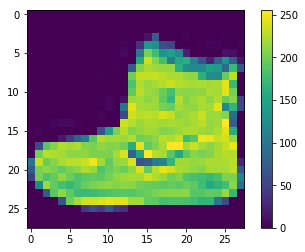

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

In [31]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름을 출력해 보죠. 데이터 포맷이 올바른지 확인하고 네트워크 구성과 훈련할 준비를 마칩니다.

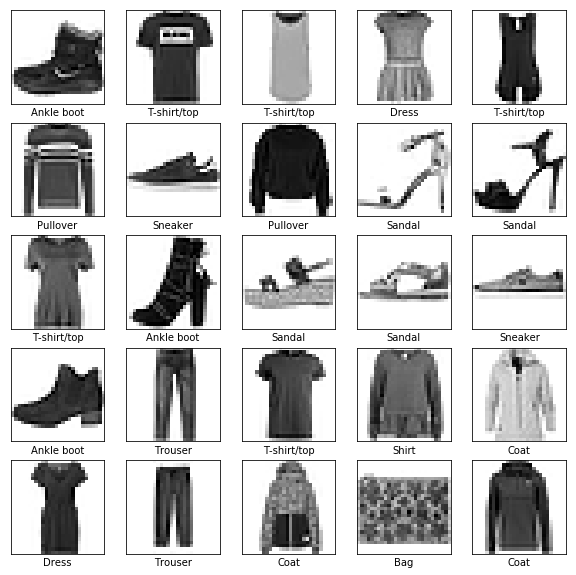

In [32]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
* 층 설정

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일합니다.

#### 층 설정

신경망의 기본 구성 요소는 층(layer)입니다. 층은 주입된 데이터에서 표현을 추출합니다. 아마도 문제를 해결하는데 더 의미있는 표현이 추출될 것입니다.

대부분 딥러닝은 간단한 층을 연결하여 구성됩니다. tf.keras.layers.Dense와 같은 층들의 가중치(parameter)는 훈련하는 동안 학습됩니다.



In [33]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일 

모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:
* 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
* 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
* 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.
    

In [35]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

신경망 모델을 훈련하는 단계는 다음과 같습니다:
1. 훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.
2. 모델이 이미지와 레이블을 매핑하는 방법을 배웁니다.
3. 테스트 세트에 대한 모델의 예측을 만듭니다-이 예에서는 test_images 배열입니다. 이 예측이 test_labels 배열의 레이블과 맞는지 확인합니다.

훈련을 시작하기 위해 model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습합니다:

In [36]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/sample - loss: 0.5007 - accuracy: 0.8236
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3743 - accuracy: 0.8644
Epoch 3/5
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3343 - accuracy: 0.8784
Epoch 4/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.3108 - accuracy: 0.8860
Epoch 5/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2933 - accuracy: 0.8920


모델이 훈련되면서 손실과 정확도 지표가 출력됩니다. 이 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성합니다.

### 모델 평가

그다음 테스트 세트에서 모델의 성능을 비교합니다:

In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3548 - accuracy: 0.8703

테스트 정확도: 0.8703


#### 예측 만들기

훈련된 모델을 사용하여 이미지에 대한 예측을 만들 수 있습니다.

In [38]:
predictions = model.predict(test_images)

여기서는 테스트 세트에 있는 각 이미지의 레이블을 예측했습니다. 첫 번째 예측을 확인해 보죠:

In [39]:
predictions[0]

array([3.0742071e-05, 2.7873218e-10, 2.9019839e-07, 9.5939605e-08,
       1.5318340e-06, 3.0748566e-04, 5.3163326e-06, 3.2235611e-02,
       6.0166208e-06, 9.6741295e-01], dtype=float32)

이 예측은 10개의 숫자 배열로 나타납니다. 이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냅니다. 가장 높은 신뢰도를 가진 레이블을 찾아보죠:



In [40]:
np.argmax(predictions[0])

9

모델은 이 이미지가 앵클 부츠(class_name[9])라고 가장 확신하고 있습니다. 이 값이 맞는지 테스트 레이블을 확인해 보죠:

In [41]:
test_labels[0]

9

10개의 신뢰도를 모두 그래프로 표현해 보겠습니다:

In [42]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0번째 원소의 이미지, 예측, 신뢰도 점수 배열을 확인해 보겠습니다.

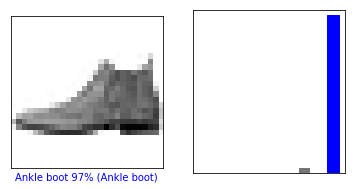

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

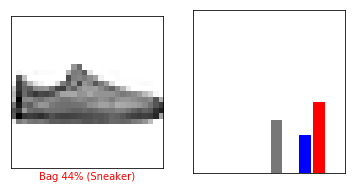

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

몇 개의 이미지의 예측을 출력해 보죠. 올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색입니다. 숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점)입니다. 신뢰도 점수가 높을 때도 잘못 예측할 수 있습니다.

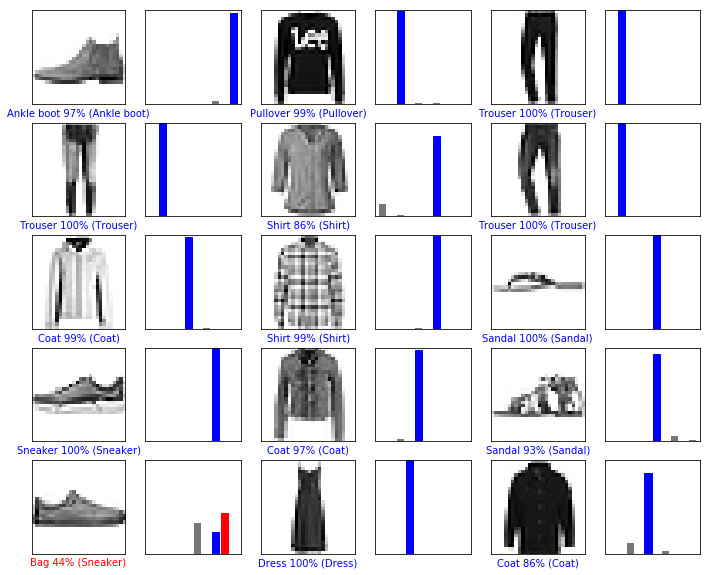

In [45]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

마지막으로 훈련된 모델을 사용하여 한 이미지에 대한 예측을 만듭니다.

In [46]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있습니다. 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 합니다:

In [47]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


이제 이 이미지의 예측을 만듭니다:

In [48]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0742100e-05 2.7873270e-10 2.9019839e-07 9.5939235e-08 1.5318340e-06
  3.0748596e-04 5.3163376e-06 3.2235637e-02 6.0166149e-06 9.6741295e-01]]


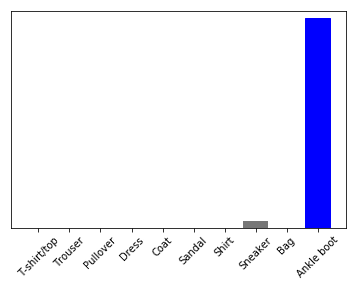

In [49]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택합니다:

In [50]:
np.argmax(predictions_single[0])

9

## Classify text - 영화 리뷰를 사용한 텍스트 분류 

* 데이터셋 임포트하기(로드하기)
* 데이터 탐색
* 데이터 전처리
* 모델 구성
* 모델 컴파일
* 모델 훈련
* 모델 평가

이 예제는 영화 리뷰(review) 텍스트를 긍정(positive) 또는 부정(negative)으로 분류합니다. 이 예제는 이진(binary)-또는 클래스(class)가 두 개인- 분류 문제입니다. 이진 분류는 머신러닝에서 중요하고 널리 사용됩니다.

여기에서는 인터넷 영화 데이터베이스(Internet Movie Database)에서 수집한 50,000개의 영화 리뷰 텍스트를 담은 IMDB 데이터셋을 사용하겠습니다. 25,000개 리뷰는 훈련용으로, 25,000개는 테스트용으로 나뉘어져 있습니다. 훈련 세트와 테스트 세트의 클래스는 균형이 잡혀 있습니다. 즉 긍정적인 리뷰와 부정적인 리뷰의 개수가 동일합니다.



In [51]:
import tensorflow as tf

import numpy as np

print(tf.__version__)

2.0.0-alpha0


### 데이터셋 임포트하기(로드하기)

IMDB 데이터셋은 텐서플로와 함께 제공됩니다. 리뷰(단어의 시퀀스(sequence))는 미리 전처리해서 정수 시퀀스로 변환되어 있습니다. 각 정수는 어휘 사전에 있는 특정 단어를 의미합니다.

다음 코드는 IMDB 데이터셋을 컴퓨터에 다운로드합니다(또는 이전에 다운로드 받았다면 캐시된 복사본을 사용합니다):

In [105]:
imdb = tf.keras.datasets.imdb

(train_data_tf, train_labels_tf), (test_data_tf, test_labels_tf) = imdb.load_data(num_words=10000)

매개변수 num_words=10000은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택합니다. 데이터 크기를 적당하게 유지하기 위해 드물게 등장하는 단어는 제외하겠습니다.

In [401]:
max_words_tf = 10000

In [219]:
word_index_tf = imdb.get_word_index()

In [220]:
word_index_tf = {k:(v+3) for k,v in word_index_tf.items()} 
word_index_tf["<PAD>"] = 0
word_index_tf["<START>"] = 1
word_index_tf["<UNK>"] = 2  # unknown
word_index_tf["<UNUSED>"] = 3

reverse_word_index_tf = dict([(value, key) for (key, value) in word_index_tf.items()])

In [106]:
print(len(train_data_tf))
print(type(train_data_tf))
print(train_data_tf[0])

25000
<class 'numpy.ndarray'>
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [108]:
print(len(train_labels_tf))
print(type(train_labels_tf))
print(train_labels_tf[0])

25000
<class 'numpy.ndarray'>
1


In [107]:
print(len(test_data_tf))
print(type(test_data_tf))
print(test_data_tf[0])

25000
<class 'numpy.ndarray'>
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]


In [109]:
print(len(test_labels_tf))
print(type(test_labels_tf))
print(test_labels_tf[0])

25000
<class 'numpy.ndarray'>
0


-------------------------------

#### 참고) 파일만 다운로드 후 임포트하는 방법

만약 다운로드 함수에 이상이 있거나, IMDB 데이터셋을 직접 다운로드 받은 후에 로드해서 작업하고 싶다면 아래의 방법을 사용합니다.

##### 파일 다운로드 & 압축풀기

In [53]:
import os

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
print(url)

filename = os.path.basename(url)
print(filename)

http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
aclImdb_v1.tar.gz


In [54]:
import sys
import requests

def download(url, filename) :
    r = requests.get(url, stream=True)
    if r.status_code == 200:
        with open(filename, 'wb') as f:
            downloaded = 0
            total = int(r.headers.get('content-length'))
            print("[*] Downloading file of size %0.2f MB" %(total/(1024*1024)))
            for data in r.iter_content(chunk_size=max(int(total/1000), 1024*1024)):
                downloaded += len(data)
                f.write(data)
                done = int(50*downloaded/total)
                sys.stdout.write('\r[{}{}]'.format('█' * done, '.' * (50-done)))
                sys.stdout.flush()
            print("\n[*] Done! : %s" %(filename))

In [55]:
download(url, filename)

[*] Downloading file of size 80.23 MB
[██████████████████████████████████████████████████]
[*] Done! : aclImdb_v1.tar.gz


In [56]:
%ls aclImdb_v1.tar.gz

aclImdb_v1.tar.gz


In [67]:
import tarfile

with tarfile.open(filename) as tar :
    tar.extractall()

In [69]:
%ls aclImdb

README      imdb.vocab  imdbEr.txt  test/       train/


##### 데이터 로드 

In [285]:
imdb_dir = './aclImdb' #본 데이터를 다운로드 해놓은 경로를 입력 

def imdb_load_data_local(root_dir, subdir) :
    
    data_dir = os.path.join(root_dir, subdir)

    labels = []
    texts = []

    for label_type in ['neg', 'pos']:
        dir_name = os.path.join(data_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname[-4:] == '.txt':
                f = open(os.path.join(dir_name, fname))
                texts.append(f.read())
                f.close()
                if label_type == 'neg':
                    labels.append(0)
                else:
                    labels.append(1)
    
    return (texts, labels)

In [286]:
train_texts_local, train_labels_local =  imdb_load_data_local(imdb_dir, "train")
test_texts_local, test_labels_local =  imdb_load_data_local(imdb_dir, "test")

In [287]:
print(len(train_texts_local))
print(type(train_texts_local))
print(train_texts_local[0])

25000
<class 'list'>
Working with one of the best Shakespeare sources, this film manages to be creditable to it's source, whilst still appealing to a wider audience.<br /><br />Branagh steals the film from under Fishburne's nose, and there's a talented cast on good form.


In [288]:
print(len(train_labels_local))
print(type(train_labels_local))
print(train_labels_local[0])

25000
<class 'list'>
0


In [289]:
print(len(test_texts_local))
print(type(test_texts_local))
print(test_texts_local[0])

25000
<class 'list'>
Alan Rickman & Emma Thompson give good performances with southern/New Orleans accents in this detective flick. It's worth seeing for their scenes- and Rickman's scene with Hal Holbrook. These three actors mannage to entertain us no matter what the movie, it seems. The plot for the movie shows potential, but one gets the impression in watching the film that it was not pulled off as well as it could have been. The fact that it is cluttered by a rather uninteresting subplot and mostly uninteresting kidnappers really muddles things. The movie is worth a view- if for nothing more than entertaining performances by Rickman, Thompson, and Holbrook.


In [290]:
print(len(test_labels_local))
print(type(test_labels_local))
print(test_labels_local[0])

25000
<class 'list'>
0


##### 전처리

In [402]:
# 설정 정보 

training_samples = 25000  # We will be training on 25000 samples
test_samples = 25000  # We will be testing on 25000 samples
max_words_local = 10000+1  # We will only consider the top 10,000 words in the dataset
                     # 1 <- <PAD>

In [370]:
texts = []
texts.extend(train_texts_local)
texts.extend(test_texts_local)

In [371]:
labels = []
labels.extend(train_labels_local)
labels.extend(test_labels_local)

In [372]:
# 전처리 

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words_local)

In [373]:
tokenizer.word_index

{}

In [374]:
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index_local = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index_local))

Found 124252 unique tokens.


In [378]:
list(tokenizer.word_index.items())[:10]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10)]

In [379]:
tokenizer.word_index["<PAD>"] = 0

In [382]:
reverse_word_index_local = dict([(value, key) for (key, value) in word_index_local.items()])

In [383]:
data = np.asarray(sequences)
labels = np.asarray(labels)

In [384]:
len(data)

50000

In [385]:
train_data_local = data[:training_samples]
train_labels_local = labels[:training_samples]
test_data_local = data[training_samples: training_samples + test_samples]
test_labels_local = labels[training_samples: training_samples + test_samples]

In [386]:
print(len(train_data_local))
print(type(train_data_local))
print(train_data_local[0])

25000
<class 'numpy.ndarray'>
[765, 16, 27, 4, 1, 116, 2229, 6686, 11, 19, 1019, 5, 26, 5, 44, 2327, 1808, 130, 2451, 5, 3, 6639, 309, 7, 7, 5078, 2261, 1, 19, 36, 464, 3024, 2, 222, 3, 1024, 174, 20, 49, 821]


In [387]:
print(len(train_labels_local))
print(type(train_labels_local))
print(train_labels_local[0])

25000
<class 'numpy.ndarray'>
0


In [388]:
print(len(test_data_local))
print(type(test_data_local))
print(test_data_local[0])

25000
<class 'numpy.ndarray'>
[1843, 9042, 3456, 5337, 197, 49, 367, 16, 2643, 168, 5734, 2489, 8, 11, 1362, 493, 44, 278, 314, 15, 65, 135, 2, 129, 16, 3573, 132, 277, 150, 5, 2801, 176, 54, 505, 48, 1, 17, 9, 184, 1, 111, 15, 1, 17, 276, 1050, 18, 27, 217, 1, 1380, 8, 147, 1, 19, 12, 9, 13, 21, 1986, 122, 14, 69, 14, 9, 98, 25, 75, 1, 192, 12, 9, 6, 31, 3, 248, 2776, 3453, 2, 666, 2776, 62, 177, 1, 17, 6, 278, 3, 635, 43, 15, 161, 51, 71, 428, 367, 31, 9042, 5337, 2]


In [389]:
print(len(train_labels_local))
print(type(train_labels_local))
print(train_labels_local[0])

25000
<class 'numpy.ndarray'>
0


----------------------

In [403]:
# 텐서플로우 케라스 다운로더 또는 로컬 파일로 로딩 - 둘 중 어느 방식이든 이후 코드는 다 동일하게 작동하도록
# 여기서 셋팅한다. 
local = True # 이 플래그가 참이면 로컬 파일 로딩 방식이다.
if local :
    max_words = max_words_local
    
    train_data = train_data_local
    train_labels = train_labels_local
    test_data = test_data_local
    test_labels = test_labels_local

    word_index = word_index_local
    reverse_word_index = reverse_word_index_local
else :
    max_words = max_words_tf 
    
    train_data = train_data_tf
    train_labels = train_labels_tf
    test_data = test_data_tf
    test_labels = test_labels_tf

    word_index = word_index_tf
    reverse_word_index = reverse_word_index_tf

### 데이터 탐색
* 정수를 단어로 다시 변환하기

잠시 데이터 형태를 알아 보죠. 이 데이터셋의 샘플은 전처리된 정수 배열입니다. 이 정수는 영화 리뷰에 나오는 단어를 나타냅니다. 레이블(label)은 정수 0 또는 1입니다. 0은 부정적인 리뷰이고 1은 긍정적인 리뷰입니다.

In [404]:
print("훈련 샘플: {}, 레이블: {}".format(len(train_data), len(train_labels)))

훈련 샘플: 25000, 레이블: 25000


리뷰 텍스트는 어휘 사전의 특정 단어를 나타내는 정수로 변환되어 있습니다. 첫 번째 리뷰를 확인해 보죠:

In [405]:
print(train_data[0])

[765, 16, 27, 4, 1, 116, 2229, 6686, 11, 19, 1019, 5, 26, 5, 44, 2327, 1808, 130, 2451, 5, 3, 6639, 309, 7, 7, 5078, 2261, 1, 19, 36, 464, 3024, 2, 222, 3, 1024, 174, 20, 49, 821]


영화 리뷰들은 길이가 다릅니다. 다음 코드는 첫 번째 리뷰와 두 번째 리뷰에서 단어의 개수를 출력합니다. 신경망의 입력은 길이가 같아야 하기 때문에 나중에 이 문제를 해결하겠습니다.



In [406]:
len(train_data[0]), len(train_data[1])

(40, 178)

#### 정수를 단어로 다시 변환하기

정수를 다시 텍스트로 변환하는 방법이 있다면 유용할 것입니다. 여기에서는 정수와 문자열을 매핑한 딕셔너리(dictionary) 객체에 질의하는 헬퍼(helper) 함수를 만들겠습니다:

In [407]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

이제 decode_review 함수를 사용해 첫 번째 리뷰 텍스트를 출력할 수 있습니다:

In [408]:
decode_review(train_data[0])

"working with one of the best shakespeare sources this film manages to be to it's source whilst still appealing to a wider audience br br branagh steals the film from under nose and there's a talented cast on good form"

### 데이터 전처리

리뷰-정수 배열-는 신경망에 주입하기 전에 텐서로 변환되어야 합니다. 변환하는 방법에는 몇 가지가 있습니다:
* 원-핫 인코딩(one-hot encoding)은 정수 배열을 0과 1로 이루어진 벡터로 변환합니다. 예를 들어 배열 [3, 5]을 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000차원 벡터로 변환할 수 있습니다. 그다음 실수 벡터 데이터를 다룰 수 있는 층-Dense 층-을 신경망의 첫 번째 층으로 사용합니다. 이 방법은 num_words * num_reviews 크기의 행렬이 필요하기 때문에 메모리를 많이 사용합니다.
* 다른 방법으로는, 정수 배열의 길이가 모두 같도록 패딩(padding)을 추가해 max_length * num_reviews 크기의 정수 텐서를 만듭니다. 이런 형태의 텐서를 다룰 수 있는 임베딩(embedding) 층을 신경망의 첫 번째 층으로 사용할 수 있습니다.

이 튜토리얼에서는 두 번째 방식을 사용하겠습니다.

영화 리뷰의 길이가 같아야 하므로 pad_sequences 함수를 사용해 길이를 맞추겠습니다:

In [409]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

샘플의 길이를 확인해 보죠:

In [410]:
len(train_data[0]), len(train_data[1])

(256, 256)

(패딩된) 첫 번째 리뷰 내용을 확인해 보죠:

In [411]:
print(train_data[0])

[ 765   16   27    4    1  116 2229 6686   11   19 1019    5   26    5
   44 2327 1808  130 2451    5    3 6639  309    7    7 5078 2261    1
   19   36  464 3024    2  222    3 1024  174   20   49  821    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

### 모델 구성

신경망은 층(layer)을 쌓아서 만듭니다. 이 구조에서는 두 가지를 결정해야 합니다:

* 모델에서 얼마나 많은 층을 사용할 것인가?
* 각 층에서 얼마나 많은 은닉 유닛(hidden unit)을 사용할 것인가?

이 예제의 입력 데이터는 단어 인덱스의 배열입니다. 예측할 레이블은 0 또는 1입니다. 이 문제에 맞는 모델을 구성해 보죠:

In [412]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [413]:
# 입력 크기는 영화 리뷰 데이터셋에 적용된 어휘 사전의 크기입니다(10,000개의 단어)
vocab_size = max_words

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16, input_shape=(None,)))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


층을 순서대로 쌓아 분류기(classifier)를 만듭니다:

1. 첫 번째 층은 Embedding 층입니다. 이 층은 정수로 인코딩된 단어를 입력 받고 각 단어 인덱스에 해당하는 임베딩 벡터를 찾습니다. 이 벡터는 모델이 훈련되면서 학습됩니다. 이 벡터는 출력 배열에 새로운 차원으로 추가됩니다. 최종 차원은 (batch, sequence, embedding)이 됩니다.
2. 그다음 GlobalAveragePooling1D 층은 sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이의 출력 벡터를 반환합니다. 이는 길이가 다른 입력을 다루는 가장 간단한 방법입니다.
3. 이 고정 길이의 출력 벡터는 16개의 은닉 유닛을 가진 완전 연결(fully-connected) 층(Dense)을 거칩니다.
4. 마지막 층은 하나의 출력 노드(node)를 가진 완전 연결 층입니다. sigmoid 활성화 함수를 사용하여 0과 1 사이의 실수를 출력합니다. 이 값은 확률 또는 신뢰도를 나타냅니다.

### 모델 컴파일

#### 손실 함수와 옵티마이저

모델이 훈련하려면 손실 함수(loss function)과 옵티마이저(optimizer)가 필요합니다. 이 예제는 이진 분류 문제이고 모델이 확률을 출력하므로(출력층의 유닛이 하나이고 sigmoid 활성화 함수를 사용합니다), binary_crossentropy 손실 함수를 사용하겠습니다.

이제 모델이 사용할 옵티마이저와 손실 함수를 설정해 보죠:

In [414]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

#### 검증 세트 만들기

모델을 훈련할 때 모델이 만난 적 없는 데이터에서 정확도를 확인하는 것이 좋습니다. 원본 훈련 데이터에서 10,000개의 샘플을 떼어내어 검증 세트(validation set)를 만들겠습니다. (왜 테스트 세트를 사용하지 않을까요? 훈련 데이터만을 사용하여 모델을 개발하고 튜닝하는 것이 목표입니다. 그다음 테스트 세트를 사용해서 딱 한 번만 정확도를 평가합니다).

In [415]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

이 모델을 512개의 샘플로 이루어진 미니배치(mini-batch)에서 40번의 에포크(epoch) 동안 훈련합니다. x_train과 y_train 텐서에 있는 모든 샘플에 대해 40번 반복한다는 뜻입니다. 훈련하는 동안 10,000개의 검증 세트에서 모델의 손실과 정확도를 모니터링합니다:

In [416]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.6622 - accuracy: 0.8197 - val_loss: 0.8183 - val_accuracy: 0.0000e+00
Epoch 2/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.5773 - accuracy: 0.8333 - val_loss: 1.0624 - val_accuracy: 0.0000e+00
Epoch 3/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.4909 - accuracy: 0.8333 - val_loss: 1.4453 - val_accuracy: 0.0000e+00
Epoch 4/40
15000/15000 [==============================] - 0s 26us/sample - loss: 0.4488 - accuracy: 0.8333 - val_loss: 1.7280 - val_accuracy: 0.0000e+00
Epoch 5/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.4399 - accuracy: 0.8333 - val_loss: 1.7606 - val_accuracy: 0.0000e+00
Epoch 6/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.4346 - accuracy: 0.8333 - val_loss: 1.7453 - val_accuracy: 0.0000e+00
Epoch 7/40
15000/15000 [========

### 모델 평가

모델의 성능을 확인해 보죠. 두 개의 값이 반환됩니다. 손실(오차를 나타내는 숫자이므로 낮을수록 좋습니다)과 정확도입니다.

In [417]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 26us/sample - loss: 0.4912 - accuracy: 0.8170
[0.49115982818484305, 0.81704]


이 예제는 매우 단순한 방식을 사용하므로 87% 정도의 정확도를 달성했습니다. 고급 방법을 사용한 모델은 95%에 가까운 정확도를 얻습니다.

#### 정확도와 손실 그래프 그리기

model.fit()은 History 객체를 반환합니다. 여기에는 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리(dictionary)가 들어 있습니다:

In [418]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

네 개의 항목이 있습니다. 훈련과 검증 단계에서 모니터링하는 지표들입니다. 훈련 손실과 검증 손실을 그래프로 그려 보고, 훈련 정확도와 검증 정확도도 그래프로 그려서 비교해 보겠습니다:

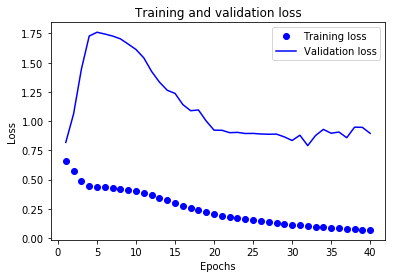

In [419]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

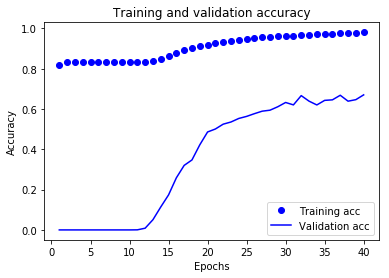

In [420]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Overfittig and underfitting (과대적합과 과소적합)
* IMDB 데이터셋 다운로드
* Overfitting(과대적합 예제)
    - 기준 모델 만들기
    - 작은 모델 만들기
    - 큰 모델 만들기
    - 훈련 손실과 검증 손실 그래프 그리기
* Overfittig(과대적합)을 방지하기 위한 전략
    - Weight Regularization (가중치를 규제하기)
    - DropOut (드롭아웃 추가하기) 

<img src="http://sanghyukchun.github.io/images/post/59-1.png" width=600 />

* 출처 - http://sanghyukchun.github.io/59/

<img src="https://nbviewer.jupyter.org/github/KonanAcademy/deep/blob/master/seminar/season02/ch05/ch05_03/figures/fig5.2.png" width=600 />

* 출처 - Deep Learng book - http://www.deeplearningbook.org/

<img src="https://static1.squarespace.com/static/5288f78fe4b088c60f4c3232/t/5a1bee80ec212d9bd32000bf/1511779974123/02.png" width=600 />

* 출처 - http://blog.agileactors.com/blog/2017/11/27/big-challenge-in-deep-learning-training-data

<img src="http://www.svms.org/srm/Sewell2006.png" width=600 />

* 출처 - http://www.svms.org/srm/

<img src="http://cs231n.github.io/assets/dataflow.jpeg" width=600 />

* 출처 - http://cs231n.github.io/optimization-1/

<img src="http://yosinski.com/mlss12/media/slides/MLSS-2012-Fukumizu-Kernel-Methods-for-Statistical-Learning_050.png" width=600 />

* 출처 - http://yosinski.com/mlss12/media/slides/MLSS-2012-Fukumizu-Kernel-Methods-for-Statistical-Learning.pdf

<img src="https://nbviewer.jupyter.org/github/songorithm/ML/blob/master/part2/study04/dml07/figures/cap7.21.png" width=600 />

출처 - Deep Learng book - http://www.deeplearningbook.org/

<img src="http://cs231n.github.io/assets/nn2/dropout.jpeg" width=600 />

* 출처 - http://cs231n.github.io/neural-networks-2/

앞서 영화 리뷰 분류와 주택 가격 예측의 두 예제에서 일정 에포크 동안 훈련하면 검증 세트에서 모델 성능이 최고점에 도달한 다음 감소하기 시작한 것을 보았습니다.

다른 말로 하면, 모델이 훈련 세트에 과대적합(overfitting)된 것입니다. 과대적합을 다루는 방법은 꼭 배워야 합니다. 훈련 세트에서 높은 성능을 얻을 수 있지만 진짜 원하는 것은 테스트 세트(또는 이전에 본 적 없는 데이터)에 잘 일반화되는 모델입니다.

과대적합의 반대는 과소적합(underfitting)입니다. 과소적합은 테스트 세트의 성능이 향상될 여지가 아직 있을 때 일어납니다. 발생하는 원인은 여러가지입니다. 모델이 너무 단순하거나, 규제가 너무 많거나, 그냥 단순히 충분히 오래 훈련하지 않는 경우입니다. 즉 네트워크가 훈련 세트에서 적절한 패턴을 학습하지 못했다는 뜻입니다.

모델을 너무 오래 훈련하면 과대적합되기 시작하고 테스트 세트에서 일반화되지 못하는 패턴을 훈련 세트에서 학습합니다. 과대적합과 과소적합 사이에서 균형을 잡아야 합니다. 이를 위해 적절한 에포크 횟수동안 모델을 훈련하는 방법을 배워보겠습니다.

과대적합을 막는 가장 좋은 방법은 더 많은 훈련 데이터를 사용하는 것입니다. 많은 데이터에서 훈련한 모델은 자연적으로 일반화 성능이 더 좋습니다. 데이터를 더 준비할 수 없을 때 그다음으로 가장 좋은 방법은 규제(regularization)와 같은 기법을 사용하는 것입니다. 모델이 저장할 수 있는 정보의 양과 종류에 제약을 부과하는 방법입니다. 네트워크가 소수의 패턴만 기억할 수 있다면 최적화 과정 동안 일반화 가능성이 높은 가장 중요한 패턴에 촛점을 맞출 것입니다.

이 노트북에서 널리 사용되는 두 가지 규제 기법인 가중치 규제와 드롭아웃(dropout)을 알아 보겠습니다. 이런 기법을 사용하여 IMDB 영화 리뷰 분류 모델의 성능을 향상시켜 보죠.

### IMDB 데이터셋 다운로드

이전 노트북에서처럼 임베딩을 사용하지 않고 여기에서는 문장을 멀티-핫 인코딩(multi-hot encoding)으로 변환하겠습니다. 이 모델은 훈련 세트에 빠르게 과대적합될 것입니다. 과대적합을 발생시키기고 어떻게 해결하는지 보이기 위해 선택했습니다.

멀티-핫 인코딩은 정수 시퀀스를 0과 1로 이루어진 벡터로 변환합니다. 정확하게 말하면 시퀀스 [3, 5]를 인덱스 3과 5만 1이고 나머지는 모두 0인 10,000 차원 벡터로 변환한다는 의미입니다.

In [421]:
NUM_WORDS = max_words

In [422]:
def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results

In [423]:
train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

만들어진 멀티-핫 벡터 중 하나를 살펴 보죠. 단어 인덱스는 빈도 순으로 정렬되어 있습니다. 그래프에서 볼 수 있듯이 인덱스 0에 가까울수록 1이 많이 등장합니다:

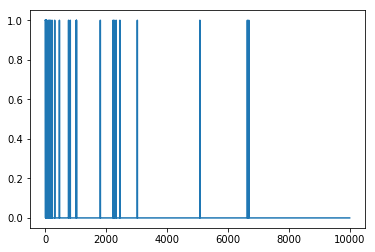

In [424]:
plt.plot(train_data[0])

### Overfitting(과대적합 예제)
* 기준 모델 만들기
* 작은 모델 만들기
* 큰 모델 만들기
* Training Loss(훈련 손실)과 Validation Loss(검증 손실) 그래프 그리기

과대적합을 막는 가장 간단한 방법은 모델의 규모를 축소하는 것입니다. 즉, 모델에 있는 학습 가능한 파라미터의 수를 줄입니다(모델 파라미터는 층(layer)의 개수와 층의 유닛(unit) 개수에 의해 결정됩니다). 딥러닝에서는 모델의 학습 가능한 파라미터의 수를 종종 모델의 "용량"이라고 말합니다. 직관적으로 생각해 보면 많은 파라미터를 가진 모델이 더 많은 "기억 용량"을 가집니다. 이런 모델은 훈련 샘플과 타깃 사이를 일반화 능력이 없는 딕셔너리와 같은 매핑으로 완벽하게 학습할 수 있습니다. 하지만 이전에 본 적 없는 데이터에서 예측을 할 땐 쓸모가 없을 것입니다.

항상 기억해야 할 점은 딥러닝 모델이 훈련 세트에는 학습이 잘 되는 경향이 있지만 진짜 해결할 문제는 학습이 아니라 일반화라는 것입니다.

반면에 네트워크의 기억 용량이 부족하다면 이런 매핑을 쉽게 학습할 수 없을 것입니다. 손실을 최소화하기 위해서는 예측 성능이 더 많은 압축된 표현을 학습해야 합니다. 또한 너무 작은 모델을 만들면 훈련 데이터를 학습하기 어렵울 것입니다. "너무 많은 용량"과 "충분하지 않은 용량" 사이의 균형을 잡아야 합니다.

안타깝지만 어떤 모델의 (층의 개수나 뉴런 개수에 해당하는) 적절한 크기나 구조를 결정하는 마법같은 공식은 없습니다. 여러 가지 다른 구조를 사용해 실험을 해봐야만 합니다.

알맞은 모델의 크기를 찾으려면 비교적 적은 수의 층과 파라미터로 시작해서 검증 손실이 감소할 때까지 새로운 층을 추가하거나 층의 크기를 늘리는 것이 좋습니다. 영화 리뷰 분류 네트워크를 사용해 이를 실험해 보죠.

Dense 층만 사용하는 간단한 기준 모델을 만들고 작은 규모의 버전와 큰 버전의 모델을 만들어 비교하겠습니다.

#### 기준 모델 만들기

In [425]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [426]:
baseline_model = tf.keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    tf.keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160032    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,321
Trainable params: 160,321
Non-trainable params: 0
_________________________________________________________________


In [427]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.5041 - accuracy: 0.7795 - binary_crossentropy: 0.5041 - val_loss: 0.3454 - val_accuracy: 0.8710 - val_binary_crossentropy: 0.3454
Epoch 2/20
25000/25000 - 3s - loss: 0.2584 - accuracy: 0.9063 - binary_crossentropy: 0.2584 - val_loss: 0.2919 - val_accuracy: 0.8783 - val_binary_crossentropy: 0.2919
Epoch 3/20
25000/25000 - 3s - loss: 0.1892 - accuracy: 0.9338 - binary_crossentropy: 0.1892 - val_loss: 0.2951 - val_accuracy: 0.8784 - val_binary_crossentropy: 0.2951
Epoch 4/20
25000/25000 - 3s - loss: 0.1489 - accuracy: 0.9496 - binary_crossentropy: 0.1489 - val_loss: 0.3175 - val_accuracy: 0.8740 - val_binary_crossentropy: 0.3175
Epoch 5/20
25000/25000 - 4s - loss: 0.1180 - accuracy: 0.9629 - binary_crossentropy: 0.1180 - val_loss: 0.3514 - val_accuracy: 0.8668 - val_binary_crossentropy: 0.3514
Epoch 6/20
25000/25000 - 3s - loss: 0.0926 - accuracy: 0.9720 - binary_crossentropy: 0.0926 - val_loss: 0.3906

#### 작은 모델 만들기

앞서 만든 기준 모델과 비교하기 위해 적은 수의 은닉 유닛을 가진 모델을 만들어 보죠:

In [428]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [429]:
smaller_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 40008     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 40,033
Trainable params: 40,033
Non-trainable params: 0
_________________________________________________________________


In [430]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6746 - accuracy: 0.5835 - binary_crossentropy: 0.6746 - val_loss: 0.6468 - val_accuracy: 0.6840 - val_binary_crossentropy: 0.6468
Epoch 2/20
25000/25000 - 3s - loss: 0.6018 - accuracy: 0.7210 - binary_crossentropy: 0.6018 - val_loss: 0.5694 - val_accuracy: 0.7800 - val_binary_crossentropy: 0.5694
Epoch 3/20
25000/25000 - 3s - loss: 0.5213 - accuracy: 0.8186 - binary_crossentropy: 0.5213 - val_loss: 0.5100 - val_accuracy: 0.8174 - val_binary_crossentropy: 0.5100
Epoch 4/20
25000/25000 - 3s - loss: 0.4643 - accuracy: 0.8655 - binary_crossentropy: 0.4643 - val_loss: 0.4760 - val_accuracy: 0.8391 - val_binary_crossentropy: 0.4760
Epoch 5/20
25000/25000 - 3s - loss: 0.4248 - accuracy: 0.8930 - binary_crossentropy: 0.4248 - val_loss: 0.4514 - val_accuracy: 0.8646 - val_binary_crossentropy: 0.4514
Epoch 6/20
25000/25000 - 3s - loss: 0.3947 - accuracy: 0.9122 - binary_crossentropy: 0.3947 - val_loss: 0.4368

#### 큰 모델 만들기

아주 큰 모델을 만들어 얼마나 빠르게 과대적합이 시작되는지 알아 볼 수 있습니다. 이 문제에 필요한 것보다 훨씬 더 큰 용량을 가진 네트워크를 추가해서 비교해 보죠:



In [431]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [432]:
bigger_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5121024   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 5,384,193
Trainable params: 5,384,193
Non-trainable params: 0
_________________________________________________________________


역시 같은 데이터를 사용해 모델을 훈련합니다:

In [433]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.3562 - accuracy: 0.8455 - binary_crossentropy: 0.3562 - val_loss: 0.2973 - val_accuracy: 0.8742 - val_binary_crossentropy: 0.2973
Epoch 2/20
25000/25000 - 7s - loss: 0.1445 - accuracy: 0.9479 - binary_crossentropy: 0.1445 - val_loss: 0.3513 - val_accuracy: 0.8670 - val_binary_crossentropy: 0.3513
Epoch 3/20
25000/25000 - 7s - loss: 0.0481 - accuracy: 0.9856 - binary_crossentropy: 0.0481 - val_loss: 0.4460 - val_accuracy: 0.8630 - val_binary_crossentropy: 0.4460
Epoch 4/20
25000/25000 - 8s - loss: 0.0063 - accuracy: 0.9990 - binary_crossentropy: 0.0063 - val_loss: 0.5937 - val_accuracy: 0.8613 - val_binary_crossentropy: 0.5937
Epoch 5/20
25000/25000 - 7s - loss: 7.7238e-04 - accuracy: 1.0000 - binary_crossentropy: 7.7238e-04 - val_loss: 0.6764 - val_accuracy: 0.8625 - val_binary_crossentropy: 0.6764
Epoch 6/20
25000/25000 - 7s - loss: 2.3047e-04 - accuracy: 1.0000 - binary_crossentropy: 2.3047e-04 - 

#### Training Loss(훈련 손실)과 Validation Loss(검증 손실) 그래프 그리기

실선은 training loss(훈련 손실)이고 점선은 validation loss(검증 손실)입니다(낮은 검증 손실이 더 좋은 모델입니다). 여기서는 작은 네트워크가 기준 모델보다 더 늦게 overfitting(과대적합)이 시작되었습니다(즉 에포크 4가 아니라 6에서 시작됩니다). 또한 overfitting(과대적합)이 시작되고 훨씬 천천히 성능이 감소합니다.

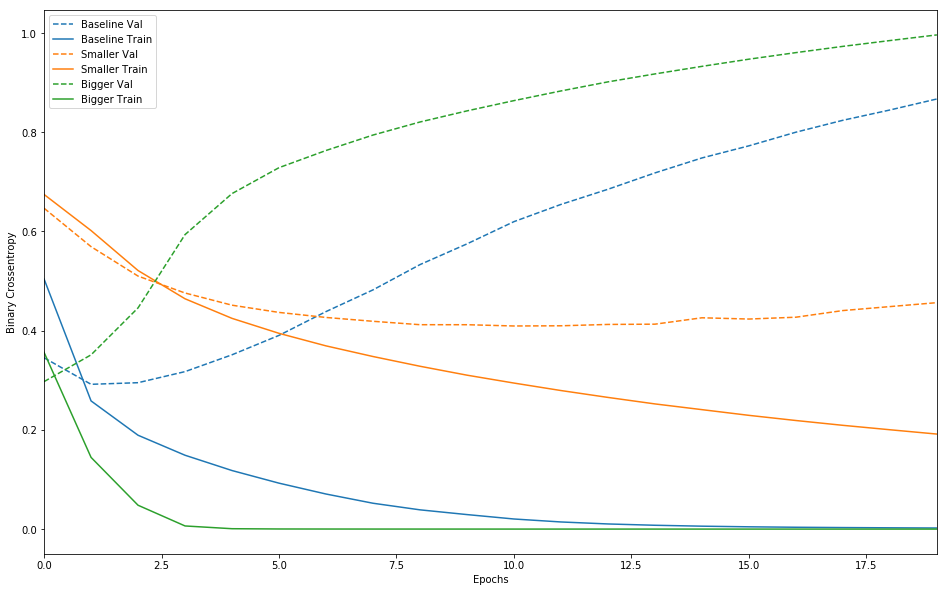

In [434]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

* 큰 네트워크는 거의 바로 첫 번째 에포크 이후에 overfitting(과대적합)이 시작되고 훨씬 더 심각하게 overfitting(과대적합)됩니다. 
* 네트워크의 용량이 많을수록 훈련 세트를 더 빠르게 모델링할 수 있습니다(훈련 손실이 낮아집니다). 
    - 하지만 더 쉽게 overfitting(과대적합)됩니다
        - 훈련 손실과 검증 손실 사이에 큰 차이가 발생합니다.



### Overfittig(과대적합)을 방지하기 위한 전략
* Weight Regularization (가중치를 규제하기)
* DropOut (드롭아웃 추가하기)

#### Weight Regularization (가중치를 규제하기)

아마도 오캄의 면도날(Occam's Razor) 이론을 들어 보았을 것입니다. 어떤 것을 설명하는 두 가지 방법이 있다면 더 정확한 설명은 최소한의 가정이 필요한 가장 "간단한" 설명일 것입니다. 이는 신경망으로 학습되는 모델에도 적용됩니다. 훈련 데이터와 네트워크 구조가 주어졌을 때 이 데이터를 설명할 수 있는 가중치의 조합(즉, 가능한 모델)은 많습니다. 간단한 모델은 복잡한 것보다 과대적합되는 경향이 작을 것입니다.

여기서 "간단한 모델"은 모델 파라미터의 분포를 봤을 때 엔트로피(entropy)가 작은 모델입니다(또는 앞 절에서 보았듯이 적은 파라미터를 가진 모델입니다). 따라서 과대적합을 완화시키는 일반적인 방법은 가중치가 작은 값을 가지도록 네트워크의 복잡도에 제약을 가하는 것입니다. 이는 가중치 값의 분포를 좀 더 균일하게 만들어 줍니다. 이를 "가중치 규제"(weight regularization)라고 부릅니다. 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가합니다. 이 비용은 두 가지 형태가 있습니다:

* L1 규제는 가중치의 절댓값에 비례하는 비용이 추가됩니다(즉, 가중치의 "L1 노름(norm)"을 추가합니다).
* L2 규제는 가중치의 제곱에 비례하는 비용이 추가됩니다(즉, 가중치의 "L2 노름"의 제곱을 추가합니다). 신경망에서는 L2 규제를 가중치 감쇠(weight decay)라고도 부릅니다. 이름이 다르지만 혼돈하지 마세요. 가중치 감쇠는 수학적으로 L2 규제와 동일합니다.

L1 규제는 일부 가중치 파라미터를 0으로 만듭니다. L2 규제는 가중치 파라미터를 제한하지만 완전히 0으로 만들지는 않습니다. 이것이 L2 규제를 더 많이 사용하는 이유 중 하나입니다.

tf.keras에서는 가중치 규제 객체를 층의 키워드 매개변수에 전달하여 가중치에 규제를 추가합니다. L2 가중치 규제를 추가해 보죠.

In [435]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [436]:
l2_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                       activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5238 - accuracy: 0.8013 - binary_crossentropy: 0.4829 - val_loss: 0.3726 - val_accuracy: 0.8726 - val_binary_crossentropy: 0.3301
Epoch 2/20
25000/25000 - 3s - loss: 0.3022 - accuracy: 0.9048 - binary_crossentropy: 0.2556 - val_loss: 0.3380 - val_accuracy: 0.8812 - val_binary_crossentropy: 0.2882
Epoch 3/20
25000/25000 - 3s - loss: 0.2529 - accuracy: 0.9264 - binary_crossentropy: 0.2002 - val_loss: 0.3491 - val_accuracy: 0.8780 - val_binary_crossentropy: 0.2944
Epoch 4/20
25000/25000 - 4s - loss: 0.2319 - accuracy: 0.9376 - binary_crossentropy: 0.1753 - val_loss: 0.3616 - val_accuracy: 0.8749 - val_binary_crossentropy: 0.3037
Epoch 5/20
25000/25000 - 3s - loss: 0.2157 - accuracy: 0.9471 - binary_crossentropy: 0.1563 - val_loss: 0.3778 - val_accuracy: 0.8713 - val_binary_crossentropy: 0.3176
Epoch 6/20
25000/25000 - 3s - loss: 0.2055 - accuracy: 0.9515 - binary_crossentropy: 0.1445 - val_loss: 0.3932

l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이 0.001 * weight_coefficient_value**2만큼 더해진다는 의미입니다. 이런 페널티(penalty)는 훈련할 때만 추가됩니다. 따라서 테스트 단계보다 훈련 단계에서 네트워크 손실이 훨씬 더 클 것입니다.

L2 규제의 효과를 확인해 보죠:

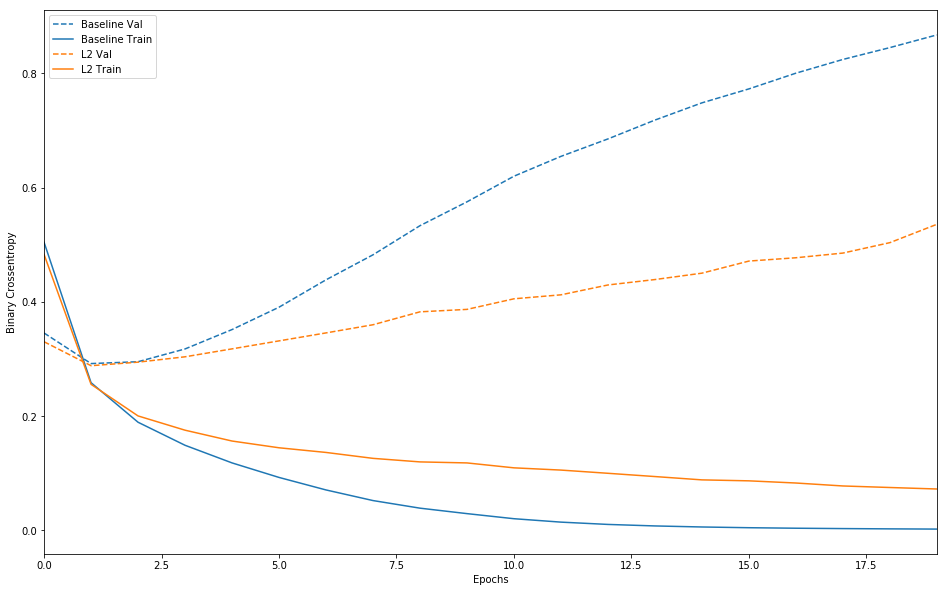

In [437]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

결과에서 보듯이 모델 파라미터의 개수는 같지만 L2 규제를 적용한 모델이 기본 모델보다 과대적합에 훨씬 잘 견디고 있습니다.

#### DropOut (드롭아웃 추가하기)

드롭아웃(dropout)은 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나입니다. 토론토(Toronto) 대학의 힌튼(Hinton)과 그의 제자들이 개발했습니다. 드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끕니다(즉, 0으로 만듭니다). 훈련하는 동안 어떤 입력 샘플에 대해 [0.2, 0.5, 1.3, 0.8, 1.1] 벡터를 출력하는 층이 있다고 가정해 보죠. 드롭아웃을 적용하면 이 벡터에서 몇 개의 원소가 랜덤하게 0이 됩니다. 예를 들면, [0, 0.5, 1.3, 0, 1.1]가 됩니다. "드롭아웃 비율"은 0이 되는 특성의 비율입니다. 보통 0.2에서 0.5 사이를 사용합니다. 테스트 단계에서는 어떤 유닛도 드롭아웃하지 않습니다. 훈련 단계보다 더 많은 유닛이 활성화되기 때문에 균형을 맞추기 위해 층의 출력 값을 드롭아웃 비율만큼 줄입니다.

tf.keras에서는 Dropout 층을 이용해 네트워크에 드롭아웃을 추가할 수 있습니다. 이 층은 바로 이전 층의 출력에 드롭아웃을 적용합니다.

IMDB 네트워크에 두 개의 Dropout 층을 추가하여 과대적합이 얼마나 감소하는지 알아 보겠습니다:

In [438]:
# 앞의 실습 모델이 jupyter notebook 상에 계속 연결되므로 정리해주는 코드를 추가  
tf.keras.backend.clear_session()

In [439]:
dpt_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6310 - accuracy: 0.6358 - binary_crossentropy: 0.6310 - val_loss: 0.5057 - val_accuracy: 0.8497 - val_binary_crossentropy: 0.5057
Epoch 2/20
25000/25000 - 3s - loss: 0.4592 - accuracy: 0.8013 - binary_crossentropy: 0.4592 - val_loss: 0.3417 - val_accuracy: 0.8733 - val_binary_crossentropy: 0.3417
Epoch 3/20
25000/25000 - 3s - loss: 0.3518 - accuracy: 0.8679 - binary_crossentropy: 0.3518 - val_loss: 0.2924 - val_accuracy: 0.8807 - val_binary_crossentropy: 0.2924
Epoch 4/20
25000/25000 - 3s - loss: 0.2897 - accuracy: 0.8955 - binary_crossentropy: 0.2897 - val_loss: 0.2806 - val_accuracy: 0.8826 - val_binary_crossentropy: 0.2806
Epoch 5/20
25000/25000 - 4s - loss: 0.2377 - accuracy: 0.9175 - binary_crossentropy: 0.2377 - val_loss: 0.2853 - val_accuracy: 0.8825 - val_binary_crossentropy: 0.2853
Epoch 6/20
25000/25000 - 3s - loss: 0.2064 - accuracy: 0.9301 - binary_crossentropy: 0.2064 - val_loss: 0.2978

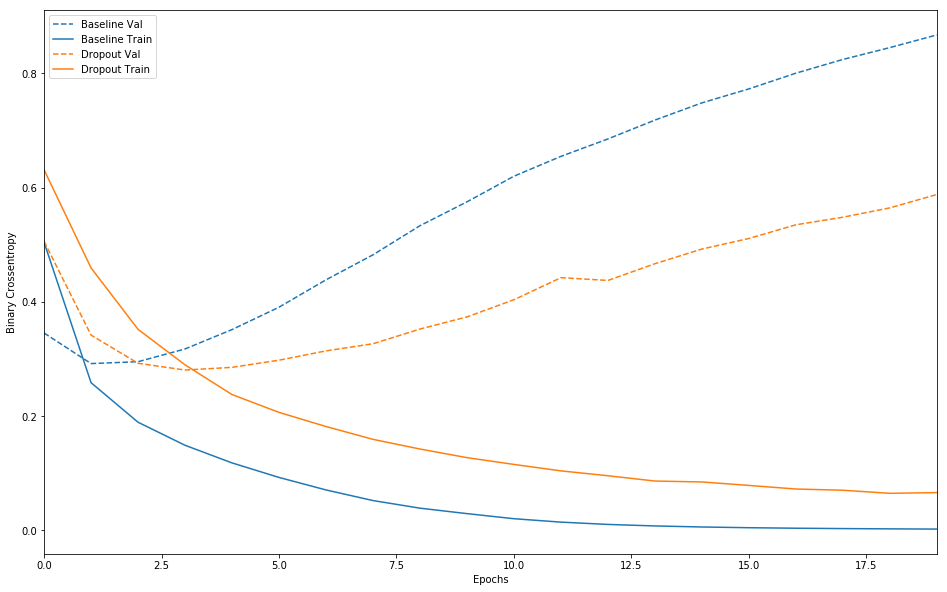

In [440]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

드롭아웃을 추가하니 기준 모델보다 확실히 향상되었습니다.

정리하면 신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법은 다음과 같습니다:

* 더 많은 훈련 데이터를 모읍니다.
* 네트워크의 용량을 줄입니다.
* 가중치 규제를 추가합니다.
* 드롭아웃을 추가합니다.

이 문서에서 다루지 않은 중요한 방법 두 가지는 데이터 증식(data-augmentation)과 배치 정규화(batch normalization)입니다.

----------------------------

# 참고자료

ML basics
* Classify image - https://www.tensorflow.org/alpha/tutorials/keras/basic_classification
* Classify text - https://www.tensorflow.org/alpha/tutorials/keras/basic_text_classification
* Overfittig and underfitting - https://www.tensorflow.org/alpha/tutorials/keras/overfit_and_underfit